In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

## Secton 1

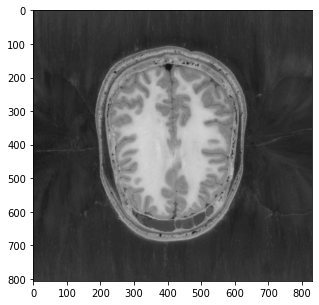

In [2]:
img = cv.imread("Color_MRI.png", cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray', vmin=0, vmax=255);

## Secton 2

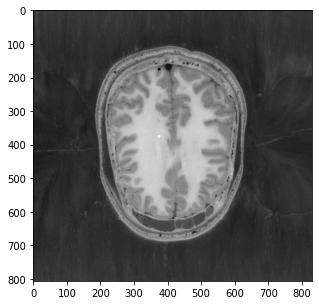

In [3]:
white = (375, 375)
gray = (375, 175)
tmp = img.copy()
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(tmp, cmap='gray', vmin=0, vmax=255);
ax.add_patch(plt.Circle(white, 3, color = 'w'))
ax.add_patch(plt.Circle(gray, 3, color = 'k'));

## Secton 3

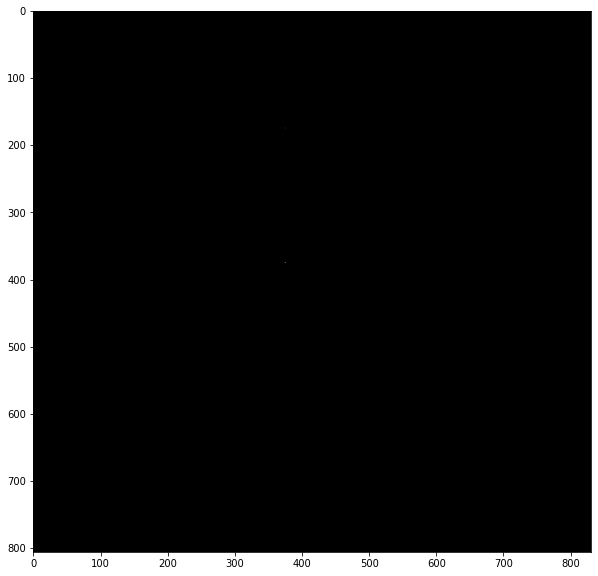

In [4]:
seed_image = np.zeros(img.shape, dtype=np.uint8)
seed_image[white[1], white[0]] = 255
seed_image[gray[1], gray[0]] = 100
plt.figure(figsize = (10, 10))
plt.imshow(seed_image, cmap='gray', vmin=0, vmax=255);

## Secton 4

In [5]:
element = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)

def region_growing(img, seed_image, seed_value=255, mode='constant', diff=35, element=element):
    tmp = np.zeros(img.shape, dtype=np.uint8)
    step = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if seed_image[i, j] != seed_value:
                continue

            tmp[i, j] = 1
            thresh = img[i, j]
            resume = True
            while resume:
                
                expanded_img = cv.dilate(tmp, element, iterations=1)
                neighbors = np.subtract(expanded_img, tmp)
                neighbors = neighbors * (np.abs(np.subtract(img, thresh, dtype=np.float32)) < diff).astype(np.uint8)
                tmp  += neighbors
                if np.count_nonzero(neighbors) == 0:
                    resume = False
                if mode == 'variable':
                    thresh = np.sum(img * tmp) / np.count_nonzero(tmp)
                step += 1
                
            break
    return tmp, step

## Section 6

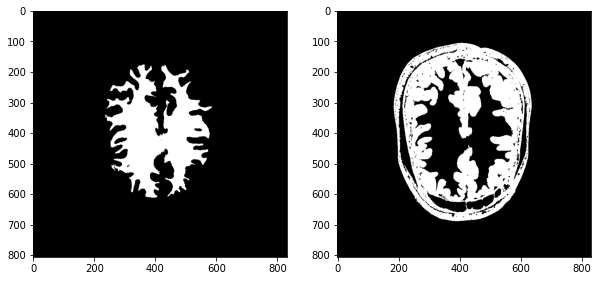

In [6]:
white_segment, step_white = region_growing(img, seed_image, seed_value=255, mode="variable", diff=35)
gray_segment, step_gray = region_growing(img, seed_image, seed_value=100, mode="variable", diff=35)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(white_segment, cmap='gray')
ax[1].imshow(gray_segment, cmap='gray');

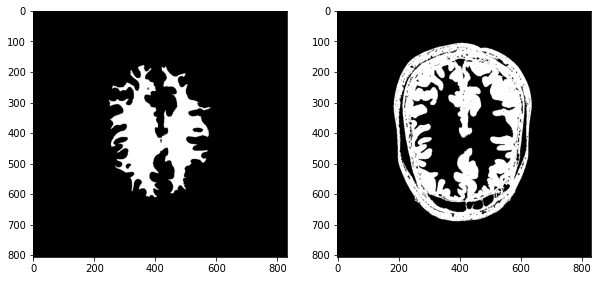

In [7]:
white_segment_cte, step_white_cte = region_growing(img, seed_image, seed_value=255, diff=35)
gray_segment_cte, step_gray_cte = region_growing(img, seed_image, seed_value=100, diff=35)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(white_segment_cte, cmap='gray')
ax[1].imshow(gray_segment_cte, cmap='gray');

## Section 7

In [8]:
print("White matter constant: ", step_white_cte)
print("Gray matter constant: ", step_gray_cte)
print("White matter variable: ", step_white)
print("Gray matter variable: ", step_gray)

White matter constant:  424
Gray matter constant:  933
White matter variable:  422
Gray matter variable:  922


## Section 8

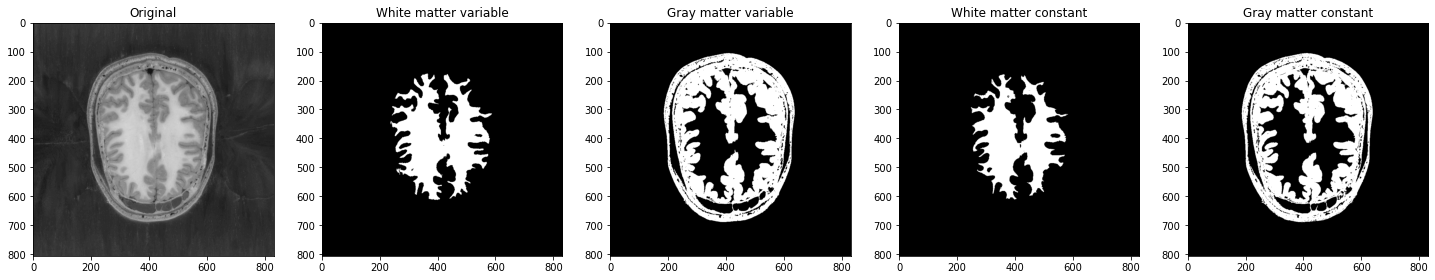

In [9]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5))

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255);
ax[0].set_title("Original")

ax[1].imshow(white_segment, cmap='gray')
ax[1].set_title("White matter variable")

ax[2].imshow(gray_segment, cmap='gray')
ax[2].set_title("Gray matter variable")

ax[3].imshow(white_segment_cte, cmap='gray')
ax[3].set_title("White matter constant")

ax[4].imshow(gray_segment_cte, cmap='gray')
ax[4].set_title("Gray matter constant");